In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as tgrad
import torch.nn.functional as F


import os
import time
import tqdm
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils

In [13]:
# extract data
loss_list = pd.read_csv('pinn_loss.csv').to_numpy()
loss_list2 = pd.read_csv('ipinn_loss.csv').to_numpy()
loss_list4 = pd.read_csv('awpinn_loss.csv').to_numpy()
loss_list5 = pd.read_csv('awipinn_loss.csv').to_numpy()
print('Done')

Done


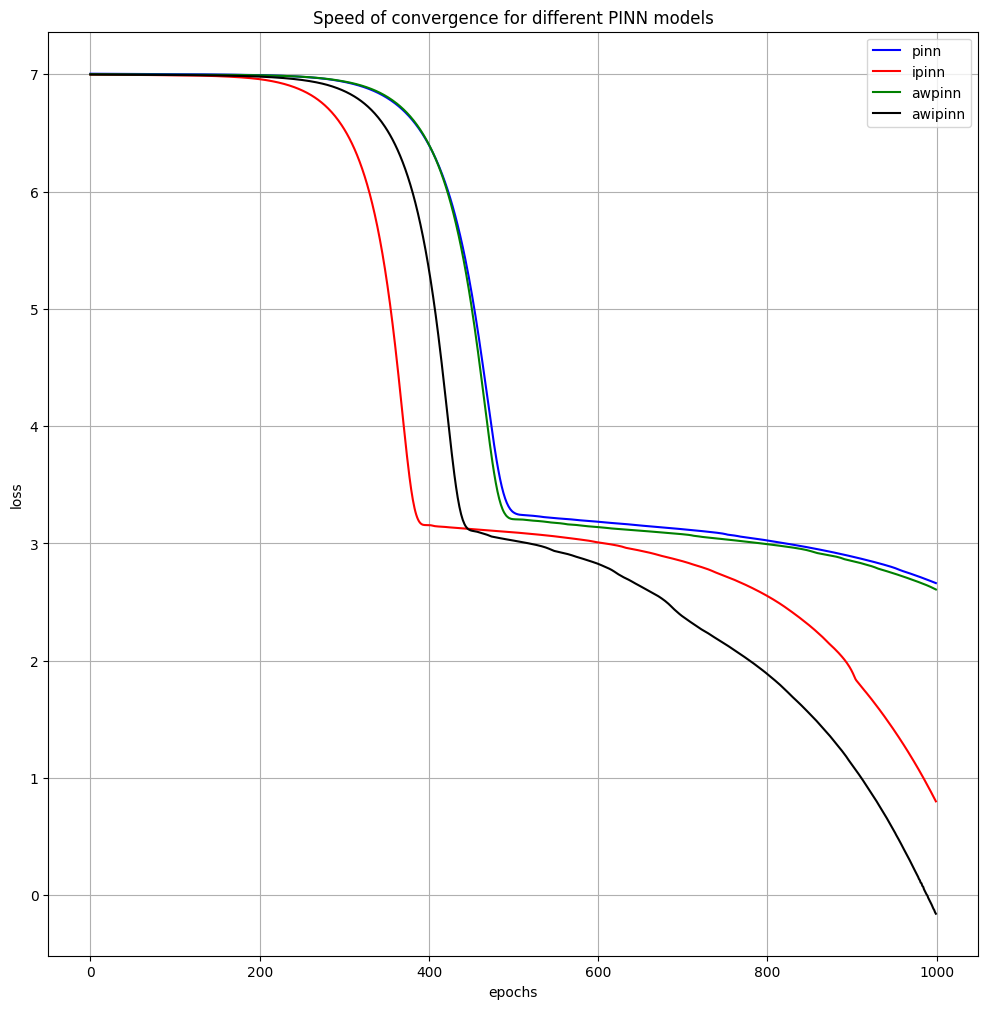

In [15]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(1000), [np.log(item) for item in loss_list[:1000]], color='blue', label='pinn')
plt.plot(range(1000), [np.log(item) for item in loss_list2[:1000]], color='red', label='ipinn')
plt.plot(range(1000), [np.log(item) for item in loss_list4[:1000]], color='green', label='awpinn')
plt.plot(range(1000), [np.log(item) for item in loss_list5[:1000]], color='black', label='awipinn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

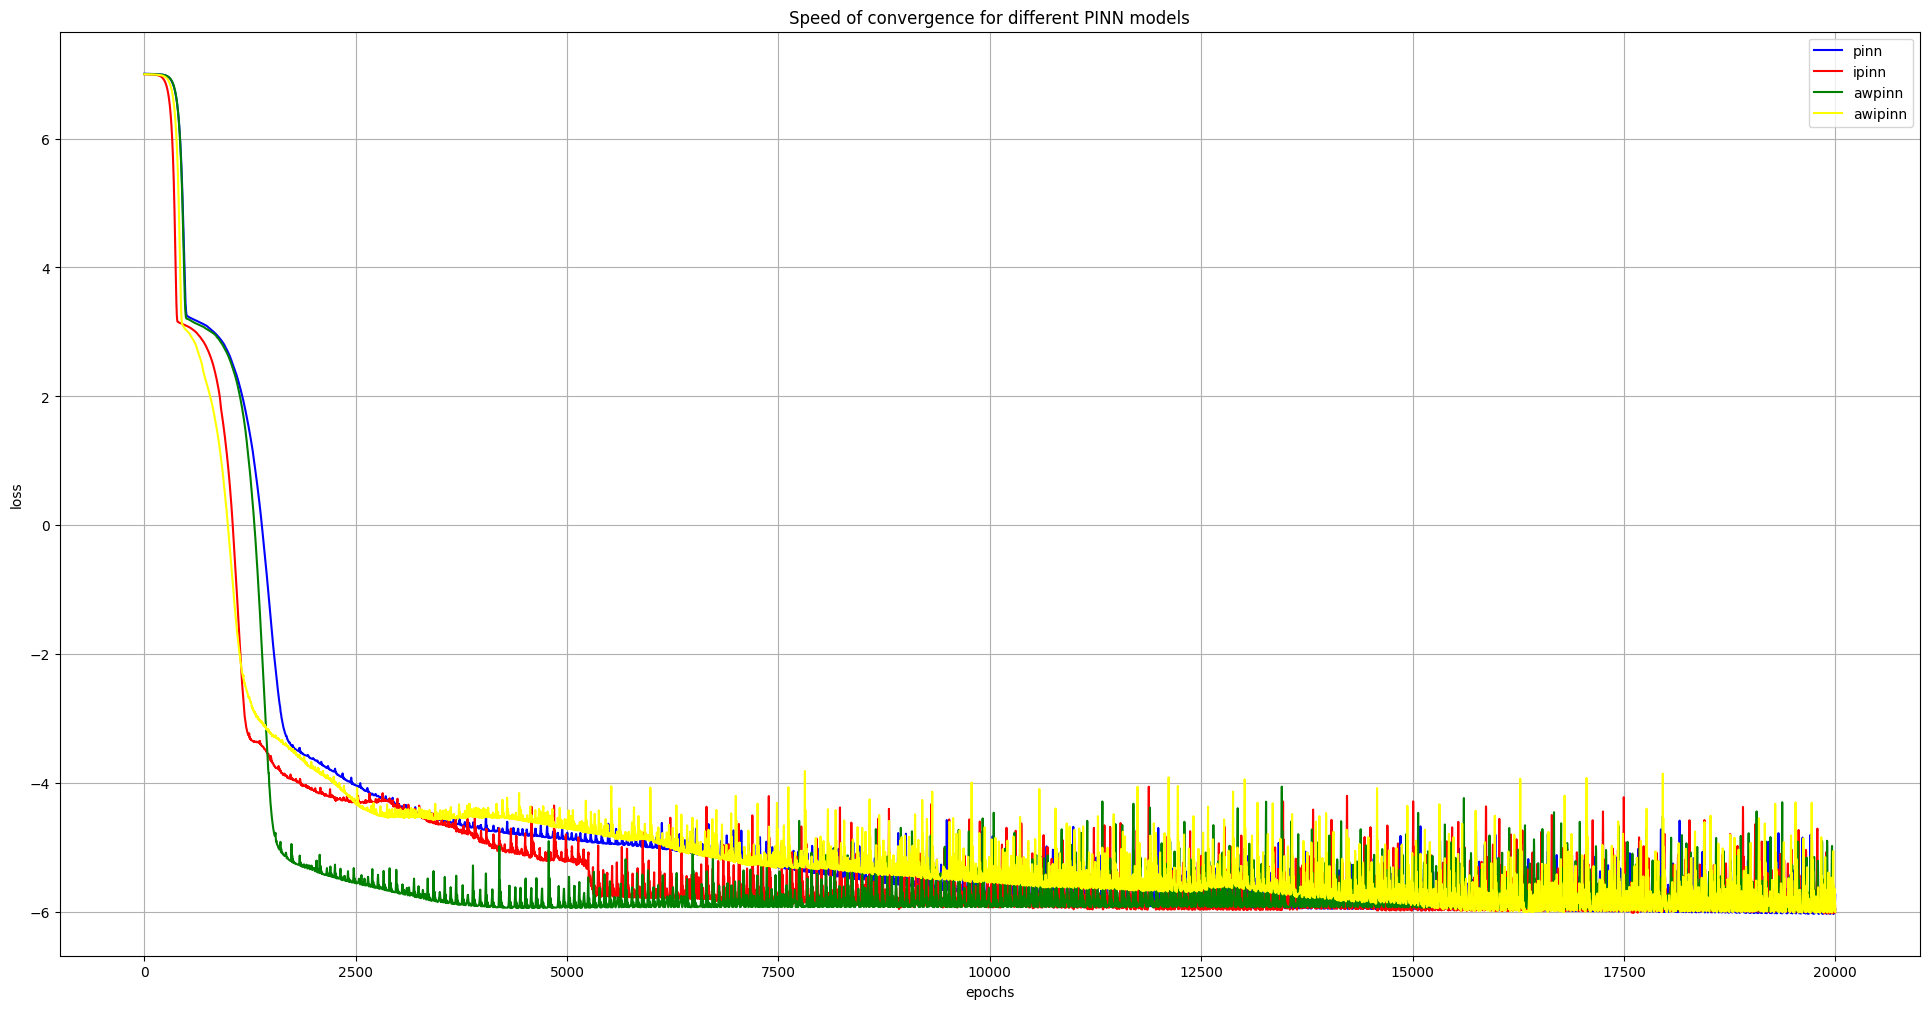

In [17]:
fig = plt.figure(figsize=(24,12))
plt.plot(range(20000), [np.log(item) for item in loss_list[:20000]], color='blue', label='pinn')
plt.plot(range(20000), [np.log(item) for item in loss_list2[:20000]], color='red', label='ipinn')
plt.plot(range(20000), [np.log(item) for item in loss_list4[:20000]], color='green', label='awpinn')
plt.plot(range(20000), [np.log(item) for item in loss_list5[:20000]], color='yellow', label='awipinn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

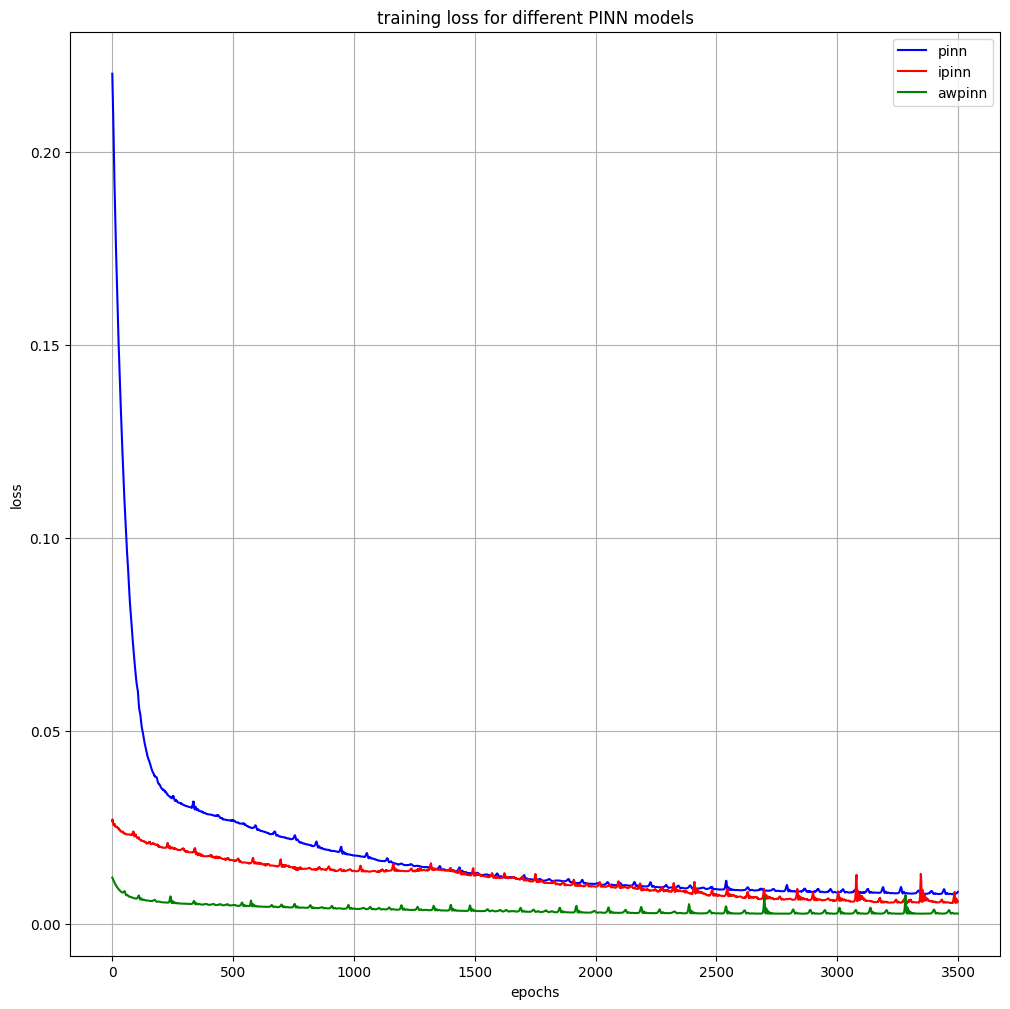

In [11]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(3500), loss_list[1500:5000], color='blue', label='pinn')
plt.plot(range(3500), loss_list2[1500:5000], color='red', label='ipinn')
plt.plot(range(3500), loss_list4[1500:5000], color='green', label='awpinn')
# plt.plot(range(6000), loss_list5[:5000], color='green', label='wipinn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different PINN models')
plt.grid(True)